# Credit Approval Model

# Business Goal
  This credit card approval predictor app empowers prospective clients to determine their likelihood of being approved for a credit card without negatively impacting their credit score. By providing a predictive probability of approval, our app makes it easier for applicants make fill out an application while avoiding the potential credit score penalties associated with hard enquiries.


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Cleaning/Exploring

### 1.  Loading the data set using the "read_csv" function from Pandas

In [2]:
df = pd.read_csv('CC Apps.csv')
df.head(10)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
5,5008819,1,1,1,0,0,0,0,0,2,17,135000.0,48.674511,3.269061,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0
6,5008825,0,1,0,0,0,0,0,0,2,25,130500.0,29.210730,3.019911,Working,Incomplete higher,Married,House / apartment,Accountants,1
7,5008830,0,0,1,0,1,0,0,0,2,31,157500.0,27.463945,4.021985,Working,Secondary / secondary special,Married,House / apartment,Laborers,1
8,5008834,0,0,1,0,0,0,0,1,2,44,112500.0,30.029364,4.435409,Working,Secondary / secondary special,Single / not married,House / apartment,Other,0
9,5008836,1,1,1,0,0,0,0,3,5,24,270000.0,34.741302,3.184186,Working,Secondary / secondary special,Married,House / apartment,Laborers,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [4]:
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [5]:
#determining how many rows and columns we are dealing with
df.shape

(9709, 20)

In [6]:
#checking any missing values
df.isnull().sum()

,0
ID,0
Gender,0
Own_car,0
Own_property,0
Work_phone,0
Phone,0
Email,0
Unemployed,0
Num_children,0
Num_family,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns.tolist()

['ID',
 'Gender',
 'Own_car',
 'Own_property',
 'Work_phone',
 'Phone',
 'Email',
 'Unemployed',
 'Num_children',
 'Num_family',
 'Account_length',
 'Total_income',
 'Age',
 'Years_employed',
 'Income_type',
 'Education_type',
 'Family_status',
 'Housing_type',
 'Occupation_type',
 'Target']

In [9]:
df['Housing_type'].value_counts()

,count
Housing_type,
House / apartment,8684
With parents,448
Municipal apartment,323
Rented apartment,144
Office apartment,76
Co-op apartment,34


In [10]:
df['Education_type'].value_counts()

,count
Education_type,
Secondary / secondary special,6761
Higher education,2457
Incomplete higher,371
Lower secondary,114
Academic degree,6


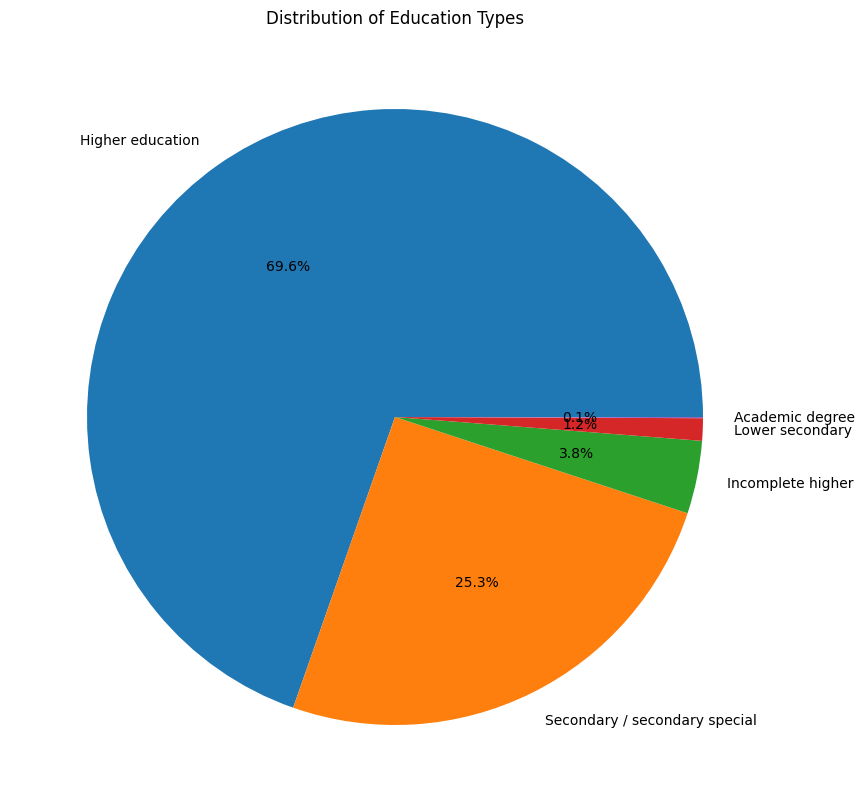

In [11]:
plt.figure(figsize=(16, 10))
plt.pie(df['Education_type'].value_counts(), labels=df['Education_type'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Education Types')
plt.show()

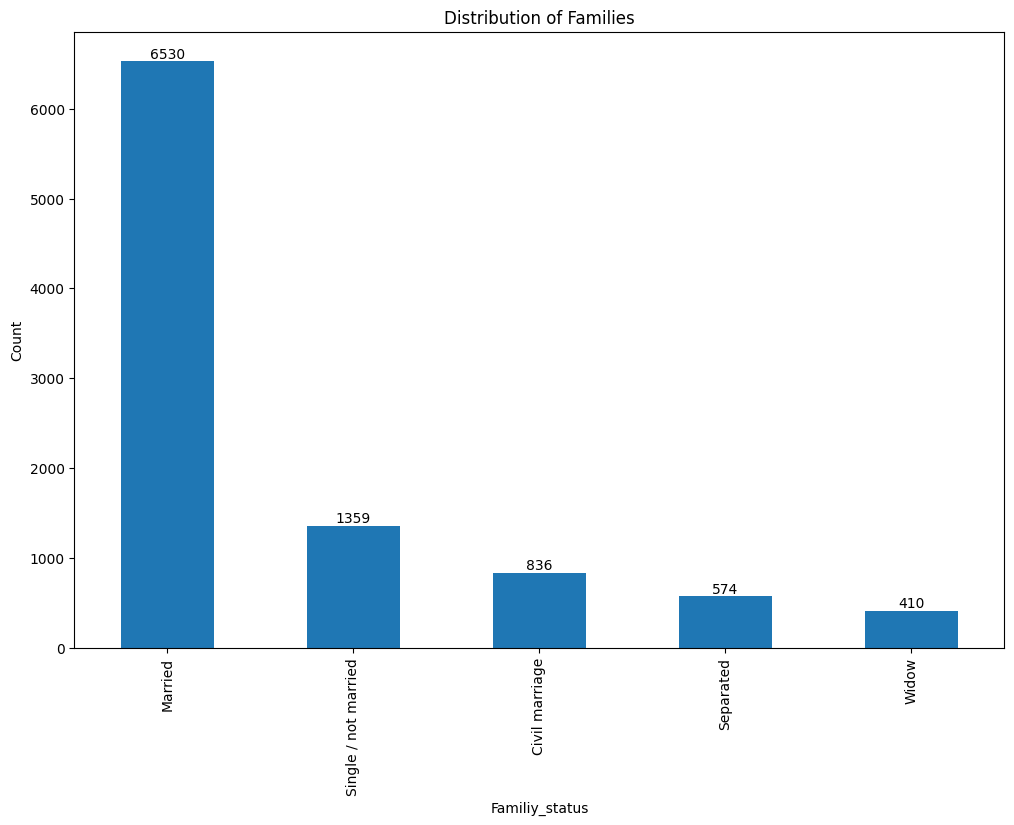

In [12]:
#A distribution chart of the family statuses in the dataset
plt.figure(figsize=(12, 8))
df['Family_status'].value_counts().plot(kind='bar')
plt.title('Distribution of Families')
plt.xlabel('Familiy_status')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='bottom')

plt.show()

In [13]:
df['Income_type'].value_counts()

,count
Income_type,
Working,4960
Commercial associate,2312
Pensioner,1712
State servant,722
Student,3


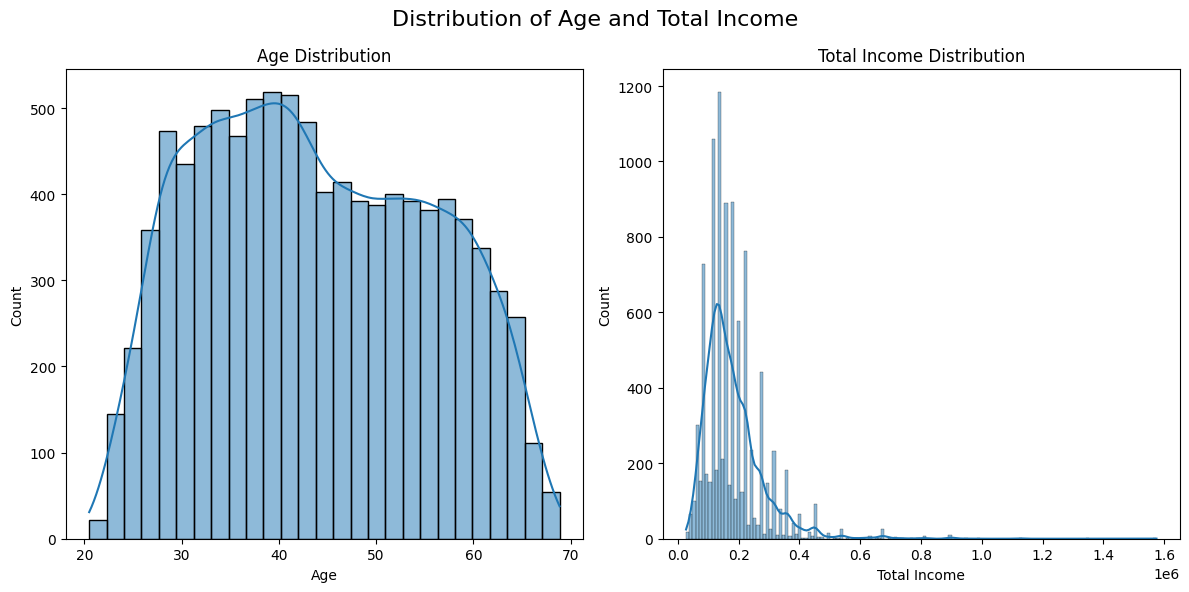

In [14]:
# Creating a figure with two subplots for Age and total income
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Age'], ax=ax1, kde=True)
ax1.set_title('Age Distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')


sns.histplot(df['Total_income'], ax=ax2, kde=True)
ax2.set_title('Total Income Distribution')
ax2.set_xlabel('Total Income')
ax2.set_ylabel('Count')

fig.suptitle('Distribution of Age and Total Income', fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
df.drop('ID', axis=1, inplace=True)
df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,1,1,1,1,0,0,0,0,2,15,...,False,False,False,True,False,False,False,False,False,False
1,1,1,1,0,0,0,0,0,2,29,...,False,False,False,False,False,False,False,False,True,False
2,0,0,1,0,1,1,0,0,1,4,...,False,False,False,False,False,False,True,False,False,False
3,0,0,1,0,0,0,1,0,1,20,...,False,False,False,True,False,False,False,False,False,False
4,1,1,1,1,1,1,0,0,2,5,...,False,False,False,False,False,False,False,False,False,False


# Data Preprocessing

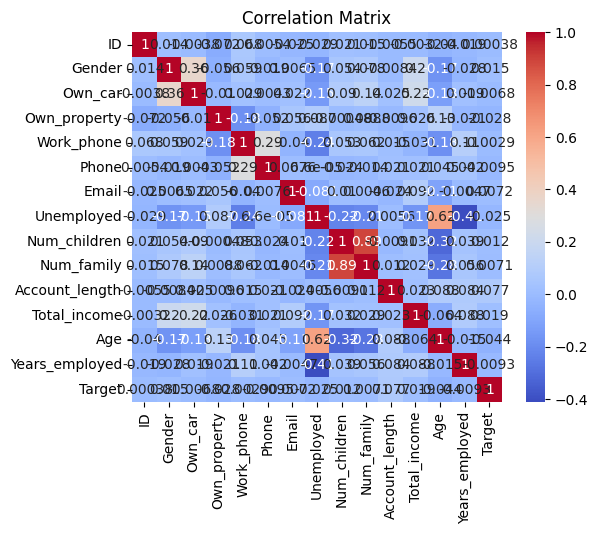

In [16]:
# a heatmap to understand the relationships between two columns. Positive correlation = two variables moving in the same direction. coefficient between 0 and 1
# Negative Correlation = two variables moving opposite of each other. coefficient betwen -1 and 0
# Zero Correlation = no relationship between the two columns/variables. coefficient close to 0
numeric_cols = df.select_dtypes(include=[int, float]).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [17]:
object_cols = df.select_dtypes(include=[object]).columns
df_onehot = pd.get_dummies(df, columns=object_cols)
df = pd.concat([df.drop(object_cols, axis=1), df_onehot], axis=1)
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,5008804,1,1,1,1,0,0,0,0,2,...,False,False,False,True,False,False,False,False,False,False
1,5008806,1,1,1,0,0,0,0,0,2,...,False,False,False,False,False,False,False,False,True,False
2,5008808,0,0,1,0,1,1,0,0,1,...,False,False,False,False,False,False,True,False,False,False
3,5008812,0,0,1,0,0,0,1,0,1,...,False,False,False,True,False,False,False,False,False,False
4,5008815,1,1,1,1,1,1,0,0,2,...,False,False,False,False,False,False,False,False,False,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            9709 non-null   int64  
 1   Gender                                        9709 non-null   int64  
 2   Own_car                                       9709 non-null   int64  
 3   Own_property                                  9709 non-null   int64  
 4   Work_phone                                    9709 non-null   int64  
 5   Phone                                         9709 non-null   int64  
 6   Email                                         9709 non-null   int64  
 7   Unemployed                                    9709 non-null   int64  
 8   Num_children                                  9709 non-null   int64  
 9   Num_family                                    9709 non-null   i